In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('GuoData.csv')

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.351757,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.363533,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.296802,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.684100,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.304653,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985


C:\Users\Guoxn\AppData\Local\Temp\ipykernel_31260\939219426.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10",len(unique_cell_types))
C:\Users\Guoxn\AppData\Local\Temp\ipykernel_31260\939219426.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset["pca1"],subset["pca2"],label = str(cell_type),cmap=colormap,color=colormap(i))


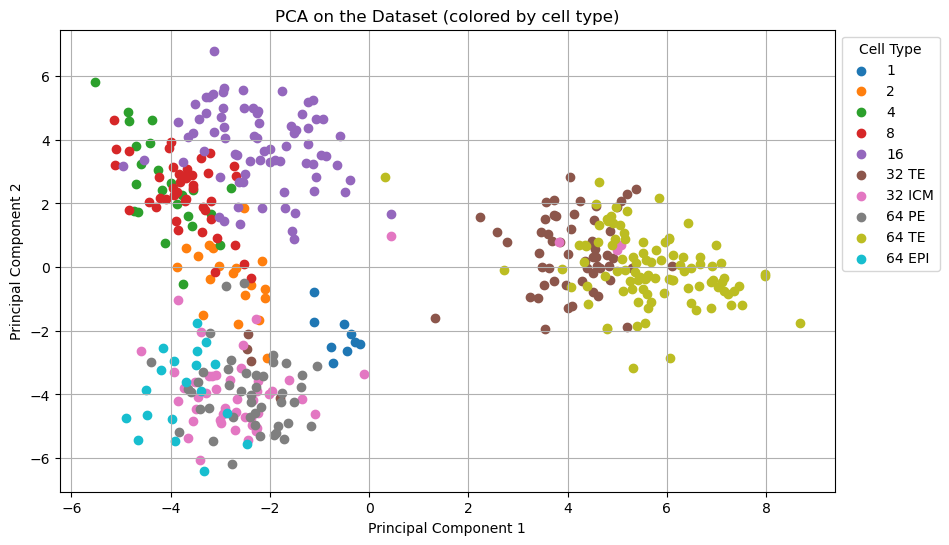

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('GuoData.csv')
cell_labels = data['Unnamed: 0']
# 去除第一列
data = data.drop(columns=["Unnamed: 0"])
# pca之前先进行标准化数据
data_std = StandardScaler().fit_transform(data)

# 创建一个pca实例 设置维度为2
pca = PCA(n_components=2)
# 降维
principalComponents = pca.fit_transform(data_std)
#创建一个df用来储存降维后的pc1和pc2
pca_df = pd.DataFrame(data=principalComponents,columns=["pca1","pca2"])
pca_df["Cell_label"] = cell_labels

pca_df.head()

# 画图展示  一般是画一个散点图
unique_cell_types= cell_labels.unique()
#创建多个颜色
colormap = plt.cm.get_cmap("tab10",len(unique_cell_types))

plt.figure(figsize=(10,6))

for i,cell_type in enumerate(unique_cell_types):
    # 为每个细胞类型画图
    subset = pca_df[pca_df["Cell_label"]==cell_type]
    plt.scatter(subset["pca1"],subset["pca2"],label = str(cell_type),cmap=colormap,color=colormap(i))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.savefig('output_plot/pca.png')
plt.show()

C:\Users\Guoxn\AppData\Local\Temp\ipykernel_31260\2108697286.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset["tsne1"],subset["tsne2"],label = str(cell_type),cmap=colormap,color=colormap(i))


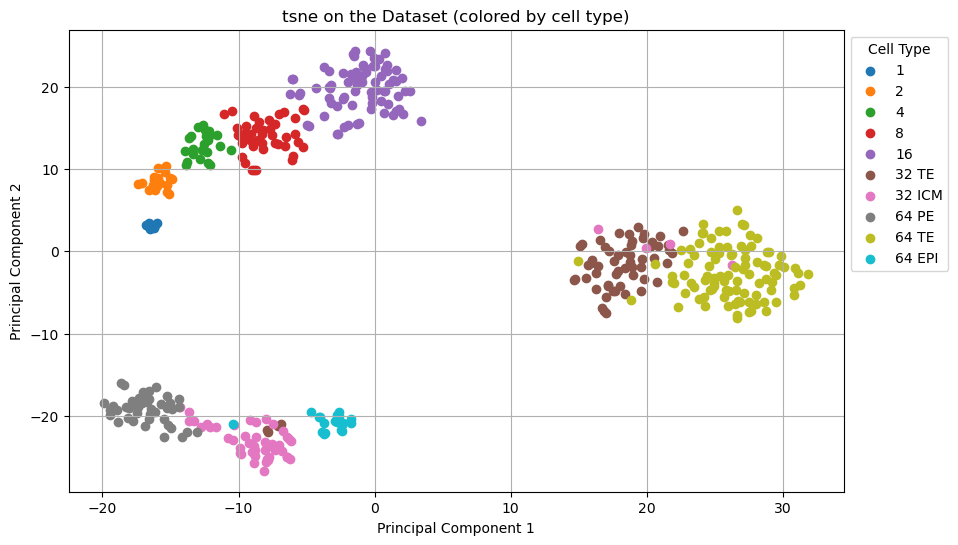

In [50]:
# t-sne降维

from sklearn.manifold import TSNE

random_state = 0
tsne_data = TSNE(
    n_components=2,
    random_state=random_state,
    n_jobs=2
).fit_transform(data_std)
tsne_df = pd.DataFrame(data=tsne_data,columns=["tsne1","tsne2"])
tsne_df["Cell_label"] = cell_labels
plt.figure(figsize=(10,6))
for i,cell_type in enumerate(unique_cell_types):
    # 为每个细胞类型画图
    subset = tsne_df[tsne_df["Cell_label"]==cell_type]
    plt.scatter(subset["tsne1"],subset["tsne2"],label = str(cell_type),cmap=colormap,color=colormap(i))
plt.title('tsne on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.savefig('output_plot/tsne.png')
plt.show()

11


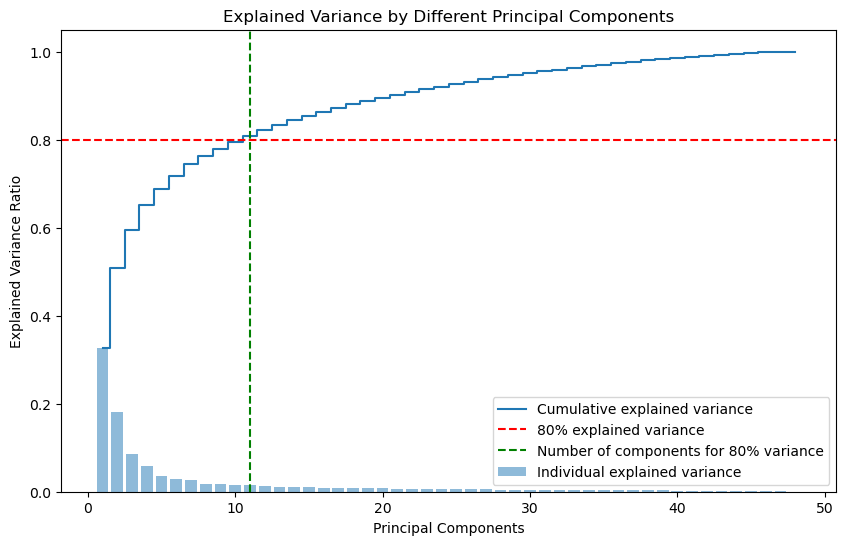

In [26]:
import numpy as np

pca = PCA()
pca.fit_transform(data_std)

# 特征向量 pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# 计算前几个特征向量的和，比如第二个数据就是前两个特征向量的和
# 计算最少多少个特征向量可以表示80%的数据
num_components = np.where(cumulative_variance>0.8)[0][0]+1

print(num_components)

plt.figure(figsize=(10,6))
# 柱状图画特征值
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,alpha=0.5, align='center', label='Individual explained variance')
# 阶梯图画前多少个特征值的和  其实也是多少个特征值能表示多少百分比的数据
plt.step(range(1,len(pca.explained_variance_ratio_)+1),cumulative_variance,where='mid', label='Cumulative explained variance')
# 画基准线 80% 和 11
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')
plt.axvline(x=num_components, color='g', linestyle='--', label='Number of components for 80% variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Explained Variance by Different Principal Components')
plt.savefig("output_plot/80.png")
plt.show()


In [47]:

def create_scatter(pc1,pc2,df):
    # 画图展示  一般是画一个散点图
    cell_labels = df["Cell_label"]
    unique_cell_types= cell_labels.unique()
    #创建多个颜色
    plt.figure(figsize=(12,8))
    colormap = plt.cm.get_cmap("tab10",len(unique_cell_types))
    for i,cell_type in enumerate(unique_cell_types):
        # 为每个细胞类型画图
        subset = pca_df[pca_df["Cell_label"]==cell_type]
        plt.scatter(subset[pc1],subset[pc2],label = str(cell_type),cmap=colormap,color=colormap(i))
    plt.xlabel('Principal Component 1')
    plt.title(f"{pc1} & {pc2}")
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cell Type', bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(True)
    plt.savefig(f"output_plot/{pc1}_{pc2}.png")
    plt.show()

C:\Users\Guoxn\AppData\Local\Temp\ipykernel_31260\351019308.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10",len(unique_cell_types))
C:\Users\Guoxn\AppData\Local\Temp\ipykernel_31260\351019308.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset[pc1],subset[pc2],label = str(cell_type),cmap=colormap,color=colormap(i))


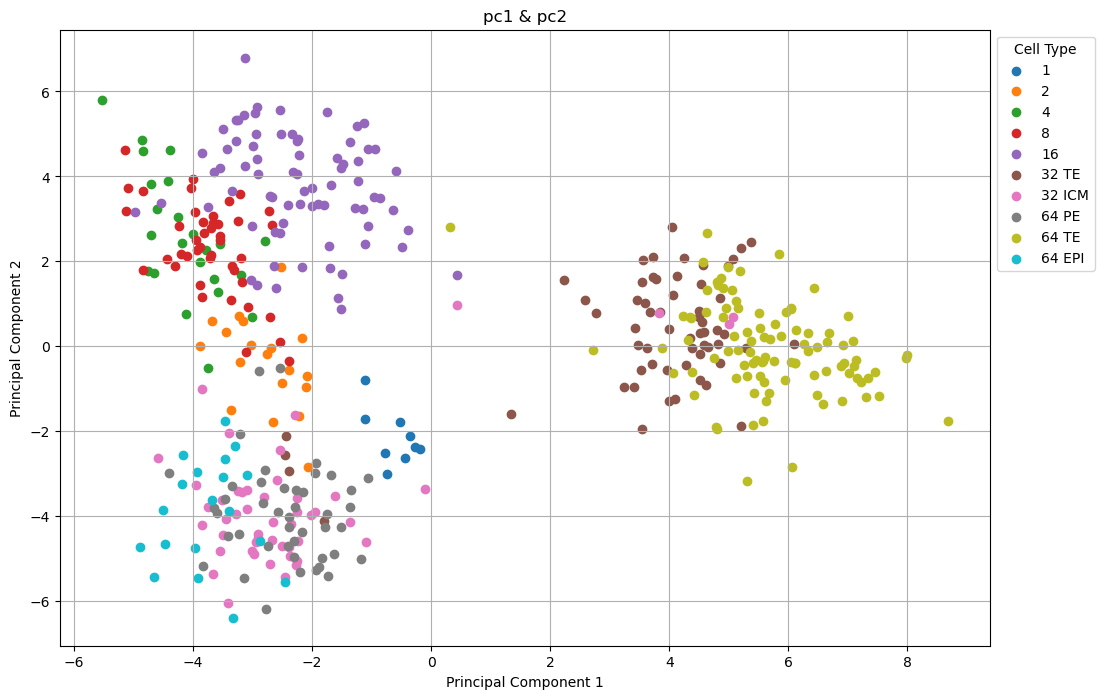

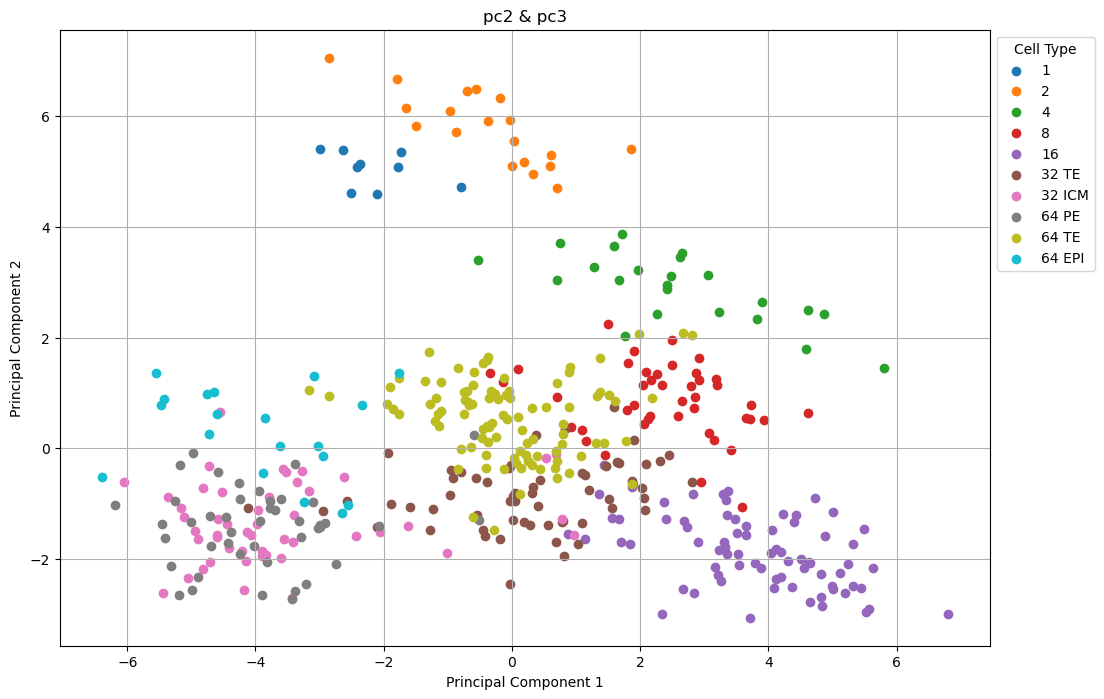

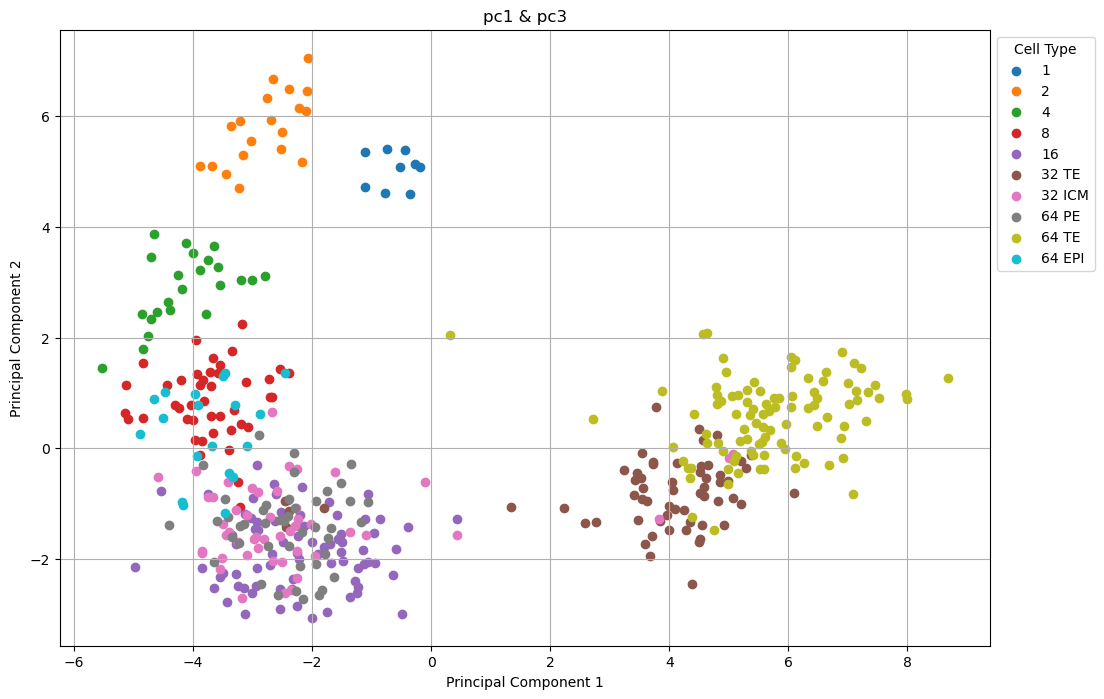

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

    
data = pd.read_csv('GuoData.csv')
cell_labels = data['Unnamed: 0']
# 去除第一列
data = data.drop(columns=["Unnamed: 0"])
# pca之前先进行标准化数据
data_std = StandardScaler().fit_transform(data)

# 创建一个pca实例 设置维度为3
pca = PCA(n_components=3)
# 降维
principalComponents = pca.fit_transform(data_std)
#创建一个df用来储存降维后的pc1和pc2 pc3
pca_df = pd.DataFrame(data=principalComponents,columns=["pc1","pc2","pc3"])
pca_df["Cell_label"] = cell_labels



create_scatter("pc1","pc2",pca_df)

create_scatter("pc2","pc3",pca_df)

create_scatter("pc1","pc3",pca_df)



c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

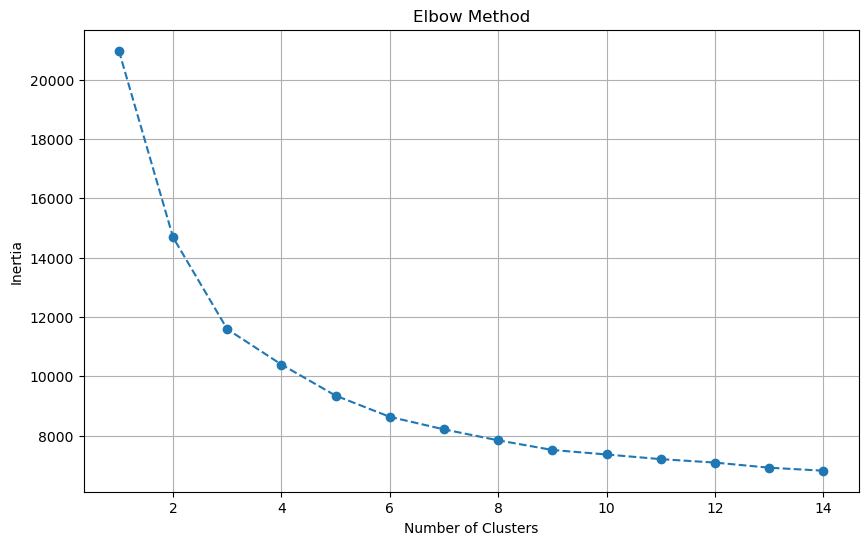

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

guo_data = pd.read_csv("GuoData.csv")
guo_data = guo_data.drop(columns=["Unnamed: 0"])
missing_values = guo_data.isnull().sum().sum()

if missing_values == 0:
    scaler = StandardScaler()
    guo_data_std = scaler.fit_transform(guo_data)

# 所要测试的聚类的数目
clusters_range = range(1, 15) 
# 距离  每次分类后类内距离平方和
distance = []

for i in clusters_range:
    # n_init=10表示初始化点的次数，会根据不同初始点进行迭代，选出最好的
    kmeans = KMeans(n_clusters=i,n_init=10)
    # 因为要对比  所以不转换 所以用fit而不用fit_transform
    kmeans.fit(guo_data_std)
    distance.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(clusters_range,distance,marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("output_plot/vary_kmeans.png")
plt.show()


In [37]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

guo_data = pd.read_csv("GuoData.csv")
#获取标签   获取特征
labels = guo_data.iloc[:,0]
features = guo_data.iloc[:,1:]

kmeans = KMeans(n_clusters=3,n_init=10).fit(features)
# 密度聚类半径为0.5  最少元素是5
dbscan = DBSCAN(eps=4.5, min_samples=8).fit(features)
# 高斯混合  full表示3个都具有独立的高斯模型
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(features)

# 获取结果
kmeans_clusters = kmeans.labels_
dbscan_clusters = dbscan.labels_
gmm_clusters = gmm.predict(features)

kmeans_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': kmeans_clusters})
dbscan_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': dbscan_clusters})
gmm_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': gmm_clusters})

for label in kmeans_comparison["聚类结果"].unique():
    counts = kmeans_comparison["原始类别"][kmeans_comparison["聚类结果"]==label].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.to_list()
    max_counts = max_counts.to_list()
    print(f'KMeans聚类结果{label}中，出现原始类别{max_labels}的次数分别是{max_counts}')

for label in dbscan_comparison["聚类结果"].unique():
    counts = dbscan_comparison["原始类别"][dbscan_comparison["聚类结果"]==label].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.to_list()
    max_counts = max_counts.to_list()
    print(f'dbscan聚类结果{label}中，出现原始类别{max_labels}的次数分别是{max_counts}')

for label in gmm_comparison["聚类结果"].unique():
    counts = gmm_comparison["原始类别"][gmm_comparison["聚类结果"]==label].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.to_list()
    max_counts = max_counts.to_list()
    print(f'高斯聚类结果{label}中，出现原始类别{max_labels}的次数分别是{max_counts}')


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans聚类结果0中，出现原始类别['32 ICM', '64 PE', '64 EPI']的次数分别是[45, 44, 19]
KMeans聚类结果2中，出现原始类别['16', '8', '4']的次数分别是[75, 43, 23]
KMeans聚类结果1中，出现原始类别['64 TE', '32 TE', '32 ICM']的次数分别是[95, 56, 3]
dbscan聚类结果0中，出现原始类别['1']的次数分别是[9]
dbscan聚类结果-1中，出现原始类别['32 ICM', '64 PE', '16']的次数分别是[46, 32, 24]
dbscan聚类结果1中，出现原始类别['16', '8', '4']的次数分别是[51, 30, 18]
dbscan聚类结果2中，出现原始类别['64 TE', '32 TE', '32 ICM']的次数分别是[86, 48, 3]
dbscan聚类结果3中，出现原始类别['64 PE']的次数分别是[12]
高斯聚类结果2中，出现原始类别['32 ICM', '64 PE', '64 EPI']的次数分别是[45, 44, 19]
高斯聚类结果0中，出现原始类别['16', '8', '4']的次数分别是[75, 43, 23]
高斯聚类结果1中，出现原始类别['64 TE', '32 TE', '32 ICM']的次数分别是[95, 56, 3]


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Guoxn\AppData\Local\Temp\ipykernel_16224\2416137875.py:44: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.tight_layout()
C:\Users\Guoxn\AppData\Local\Temp\ipykernel_16224\2416137875.py:44: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from current font.
  plt.tight_layout()
C:\Users\Guoxn\AppData\Local\Temp\ipykernel_16

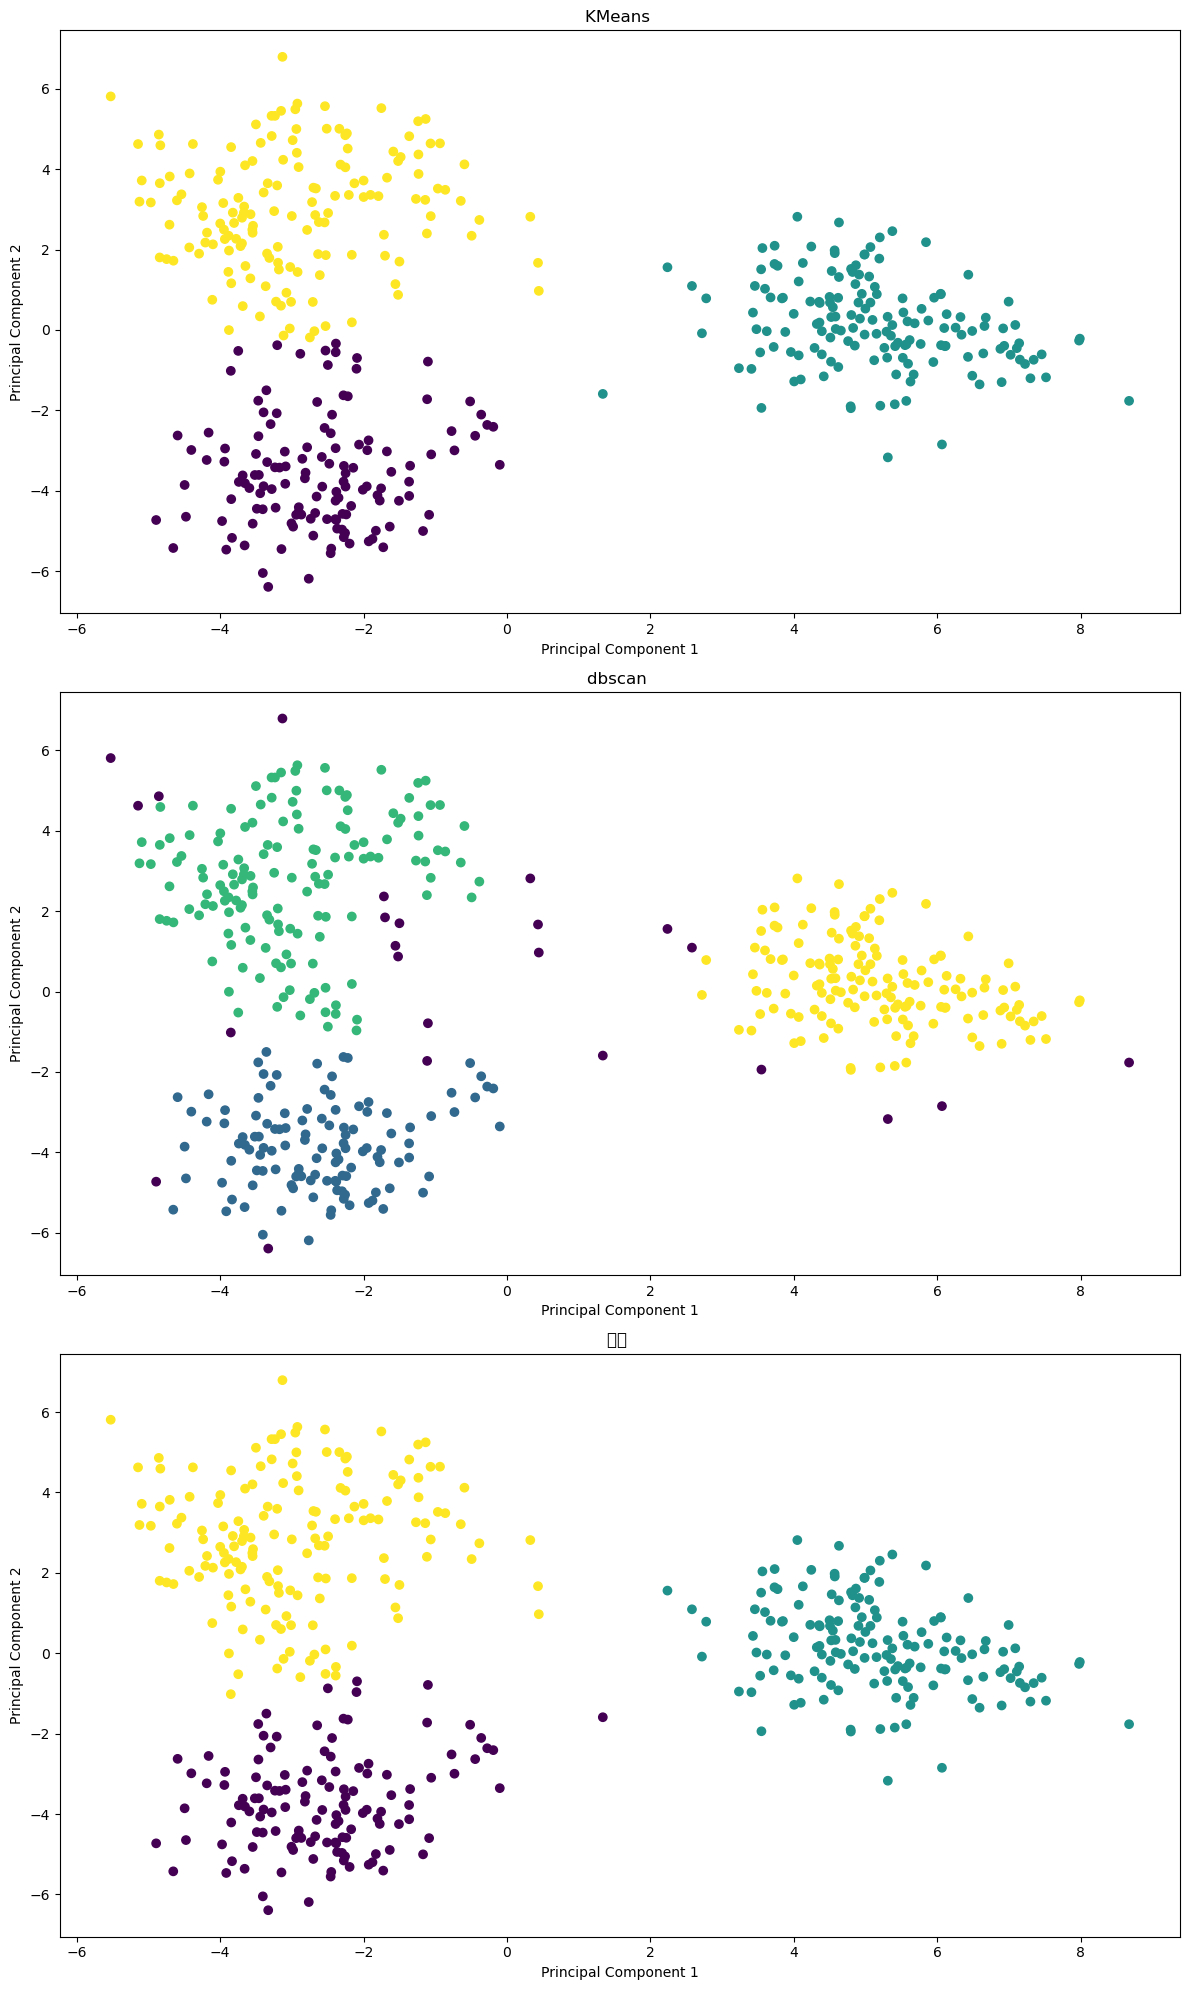

In [48]:
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=2)
features = guo_data.iloc[:,1:]
labels = guo_data.iloc[:, 0]
reduced_features = pca.fit_transform(features)

# 和上面一样  只不过是降维后的数据
reduced_kmeans = KMeans(n_clusters=3,n_init=10).fit(reduced_features)
# 密度聚类半径为0.5  最少元素是5
reduced_dbscan = DBSCAN(eps=0.8, min_samples=8).fit(reduced_features)
# 高斯混合  full表示3个都具有独立的高斯模型
reduced_gmm = GaussianMixture(n_components=3, covariance_type='full').fit(reduced_features)

reduced_kmeans_clusters = reduced_kmeans.labels_
reduced_dbscan_clusters = reduced_dbscan.labels_
reduced_gmm_clusters = reduced_gmm.predict(reduced_features)


fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(12,20))


# 因为降维了  所以可以可视化了。
axs[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=reduced_kmeans_clusters)
axs[0].set_title('KMeans ')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')



axs[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=reduced_dbscan_clusters)
axs[1].set_title('dbscan ')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')



axs[2].scatter(reduced_features[:, 0], reduced_features[:, 1], c=reduced_gmm_clusters)
axs[2].set_title('高斯 ')
axs[2].set_xlabel('Principal Component 1')
axs[2].set_ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig("output_plot/reduced_clusters.png")
plt.show()



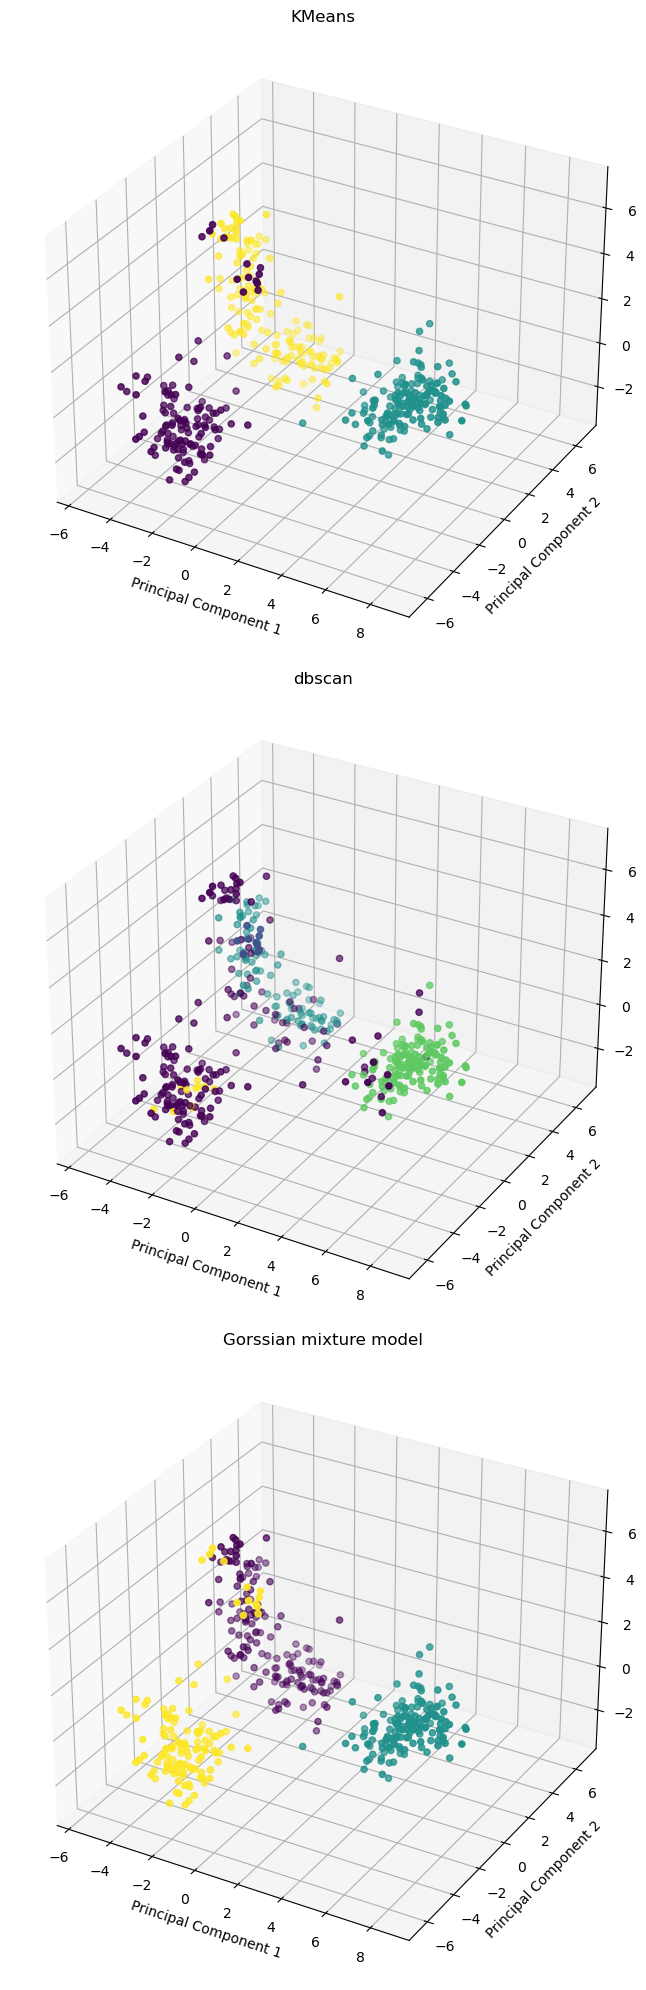

In [74]:
# 三维可视化。
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

# 使用PCA进行降维
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)


fig = plt.figure(figsize=(12, 20))
ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')


# 绘制KMeans聚类结果的三维散点图
#设置为3维度

ax1.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=kmeans_clusters)
ax1.set_title('KMeans')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')


# 绘制密度聚类

ax2.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=dbscan_clusters)
ax2.set_title('dbscan')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# 绘制高斯混合模型聚类结果的三维散点图

ax3.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=gmm_clusters)
ax3.set_title('Gorssian mixture model')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.set_zlabel('Principal Component 3')

plt.tight_layout()
plt.savefig("output_plot/pca_3d_clusters.png")


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


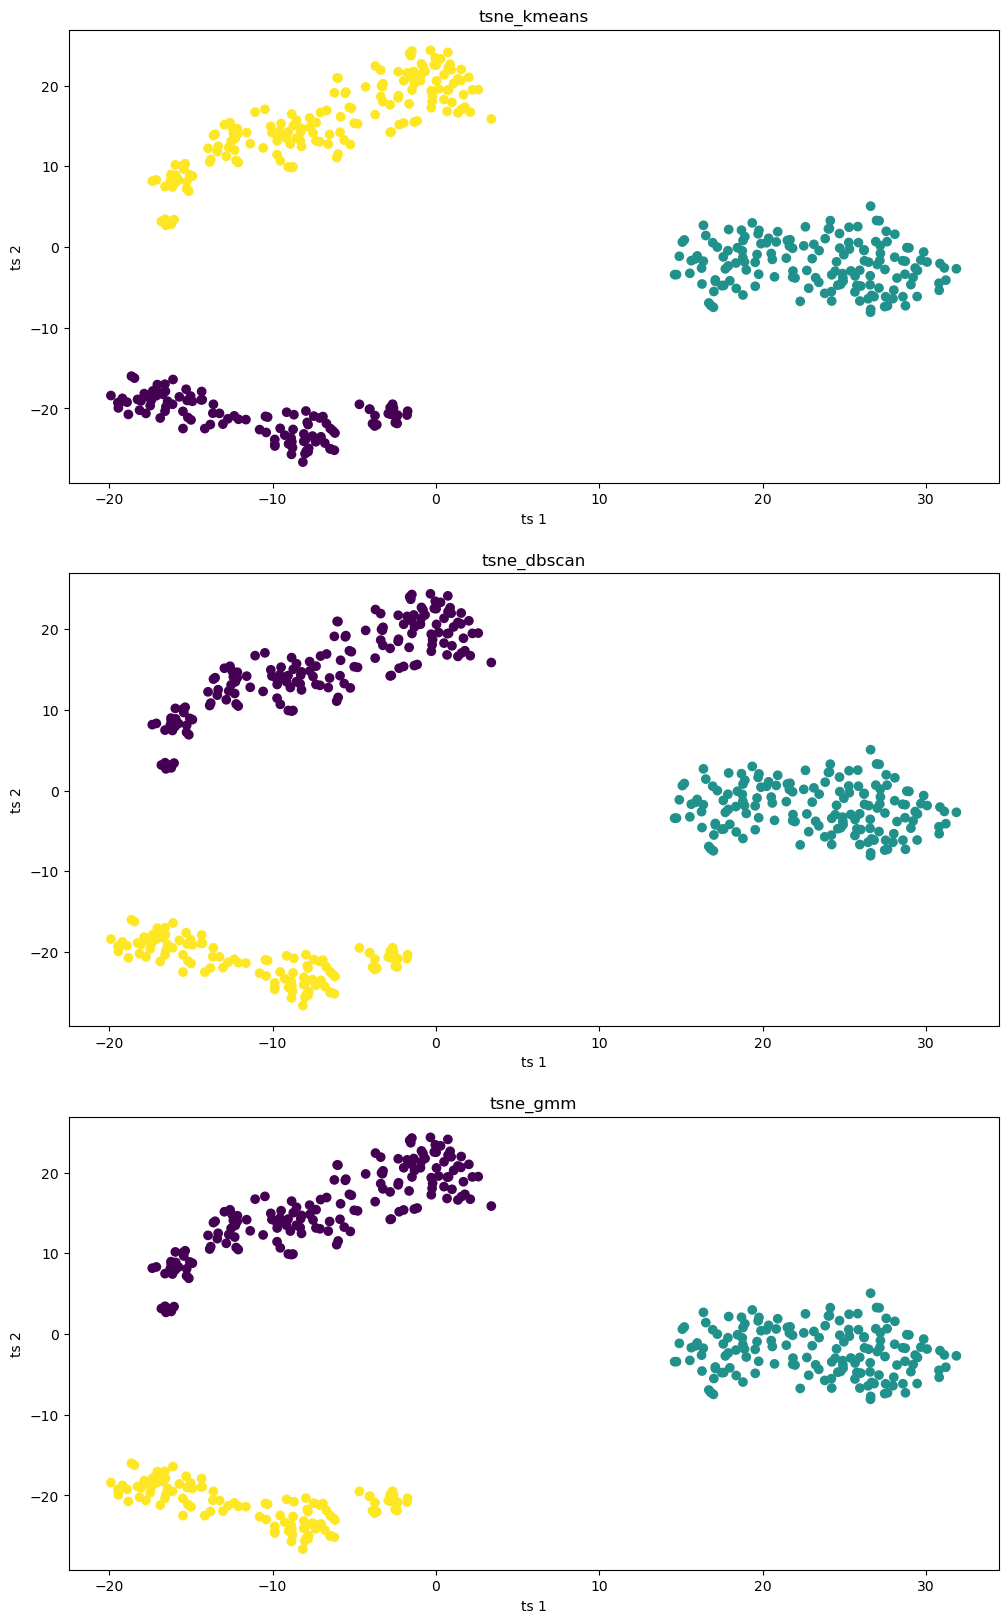

In [65]:
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

data = pd.read_csv('GuoData.csv')
cell_labels = data['Unnamed: 0']
# 去除第一列
data = data.drop(columns=["Unnamed: 0"])
# pca之前先进行标准化数据
data_std = StandardScaler().fit_transform(data)
random_state = 0
tsne_data = TSNE(
    n_components=2,   
    random_state=random_state,
    n_jobs=2
).fit_transform(data_std)


tsne_kmeans = KMeans(n_clusters=3,n_init=10).fit(tsne_data)

tsne_dbscan = DBSCAN(eps=5,min_samples=5).fit(tsne_data)

tsne_gmm = GaussianMixture(n_components=3, covariance_type='full').fit(tsne_data)

tsne_kmeans_clusters = tsne_kmeans.labels_
tsne_dbscan_clusters = tsne_dbscan.labels_
tsne_gmm_clusters = tsne_gmm.predict(tsne_data)

fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(12,20))

axs[0].scatter(tsne_data[:,0],tsne_data[:,1],c=tsne_kmeans_clusters)
axs[0].set_title("tsne_kmeans")
axs[0].set_xlabel('ts 1')
axs[0].set_ylabel("ts 2")


axs[1].scatter(tsne_data[:,0],tsne_data[:,1],c=tsne_dbscan_clusters)
axs[1].set_title("tsne_dbscan")
axs[1].set_xlabel('ts 1')
axs[1].set_ylabel("ts 2")


axs[2].scatter(tsne_data[:,0],tsne_data[:,1],c=tsne_gmm_clusters)
axs[2].set_title("tsne_gmm")
axs[2].set_xlabel('ts 1')
axs[2].set_ylabel("ts 2")

plt.savefig("output_plot/tsne_clusters.png")

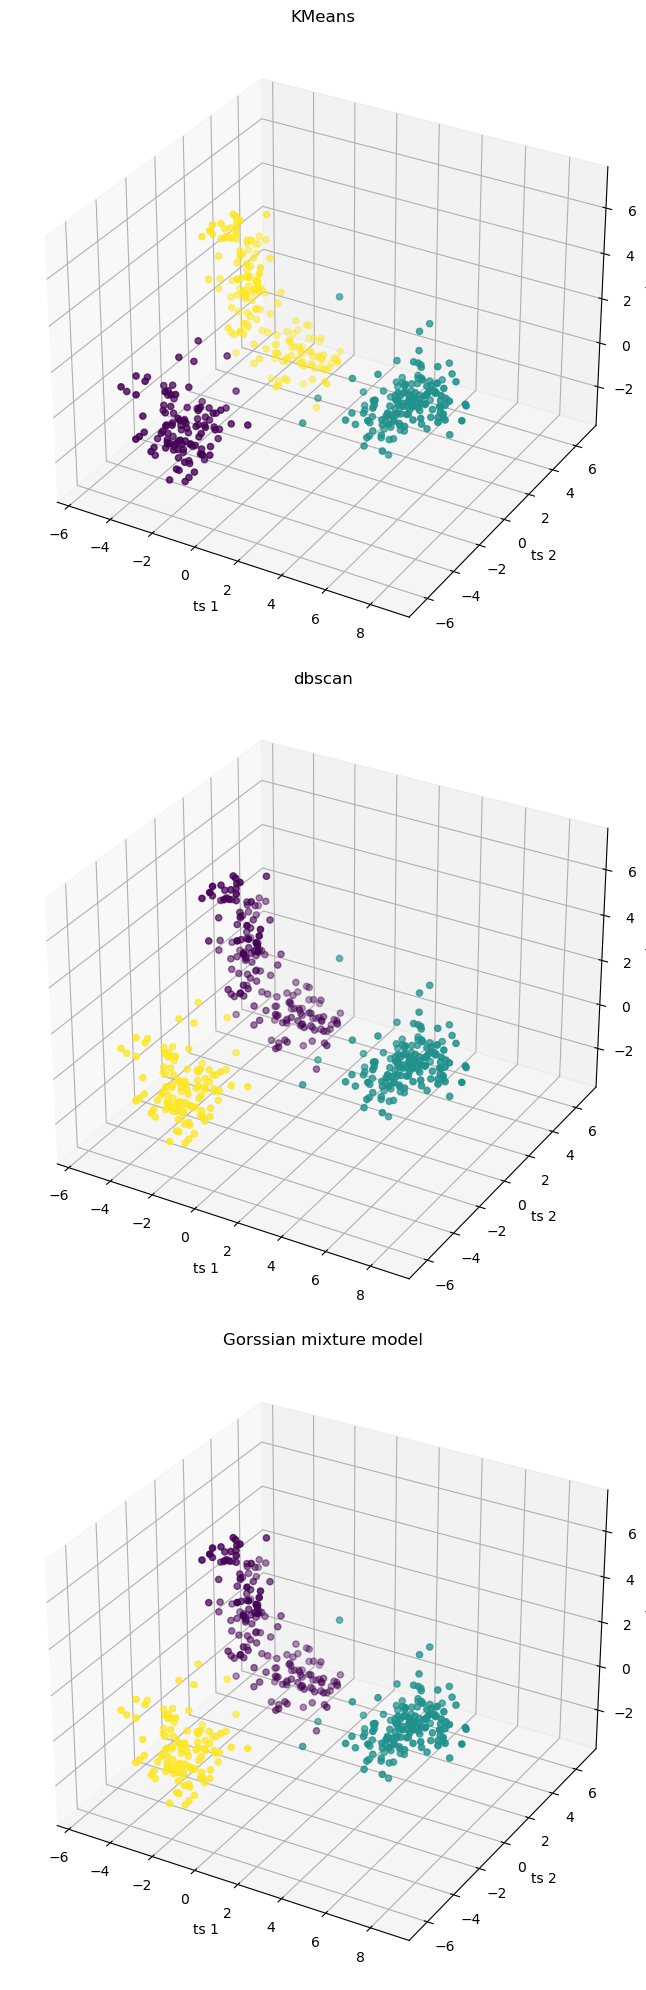

In [75]:




fig = plt.figure(figsize=(12, 20))
ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')


# 绘制KMeans聚类结果的三维散点图
#设置为3维度

ax1.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=tsne_kmeans_clusters)
ax1.set_title('KMeans')
ax1.set_xlabel('ts 1')
ax1.set_ylabel('ts 2')
ax1.set_zlabel('ts 3')


# 绘制密度聚类

ax2.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=tsne_dbscan_clusters)
ax2.set_title('dbscan')
ax2.set_xlabel('ts 1')
ax2.set_ylabel('ts 2')
ax2.set_zlabel('ts 3')

# 绘制高斯混合模型聚类结果的三维散点图

ax3.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=tsne_gmm_clusters)
ax3.set_title('Gorssian mixture model')
ax3.set_xlabel('ts 1')
ax3.set_ylabel('ts 2')
ax3.set_zlabel('ts 3')

plt.tight_layout()
plt.savefig("output_plot/tsne_3d_clusters.png")